# **Crop Price Prediction**

## **1. Project Description**
- This project aims to predict the future prices of crops based on historical data and other influencing factors.
- **Objective**: Help farmers and stakeholders make informed decisions about crop sales and planting schedules.
- **Approach**: Machine Learning models are used to analyze past trends and forecast prices accurately.
- **Significance**:
  - Supports agricultural planning and decision-making.
  - Mitigates risks associated with price fluctuations in the agricultural sector.


In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## **2. Importing**

### *Importing Libraries*

In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### *Importing Dataset*

In [3]:
data=pd.read_csv('Scrambled_Agricultural_Dataset.csv')

In [4]:
columns = data.columns
print(columns)

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price'],
      dtype='object')


## **3. EDA**

In [5]:
#Checking The Data
data.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Mehsana,Kadi,Castor Seed,Caster,FAQ,01-08-2023,NaN,NaN,NaN
1,Uttar Pradesh,Banda,Baberu,Garlic,Garlic,FAQ,28-07-2023,NaN,NaN,NaN
2,Maharashtra,Pune,Pune(Moshi),Pomegranate,Other,FAQ,30-07-2023,NaN,NaN,NaN
3,Punjab,Hoshiarpur,Dasuya,Papaya,Other,Medium,01-08-2023,NaN,NaN,NaN
4,Uttar Pradesh,Aligarh,Charra,Pumpkin,Pumpkin,FAQ,28-07-2023,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     20784 non-null  float64
 8   Max Price     20784 non-null  float64
 9   Modal Price   20784 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


### *Histograms*

<function matplotlib.pyplot.show(close=None, block=None)>

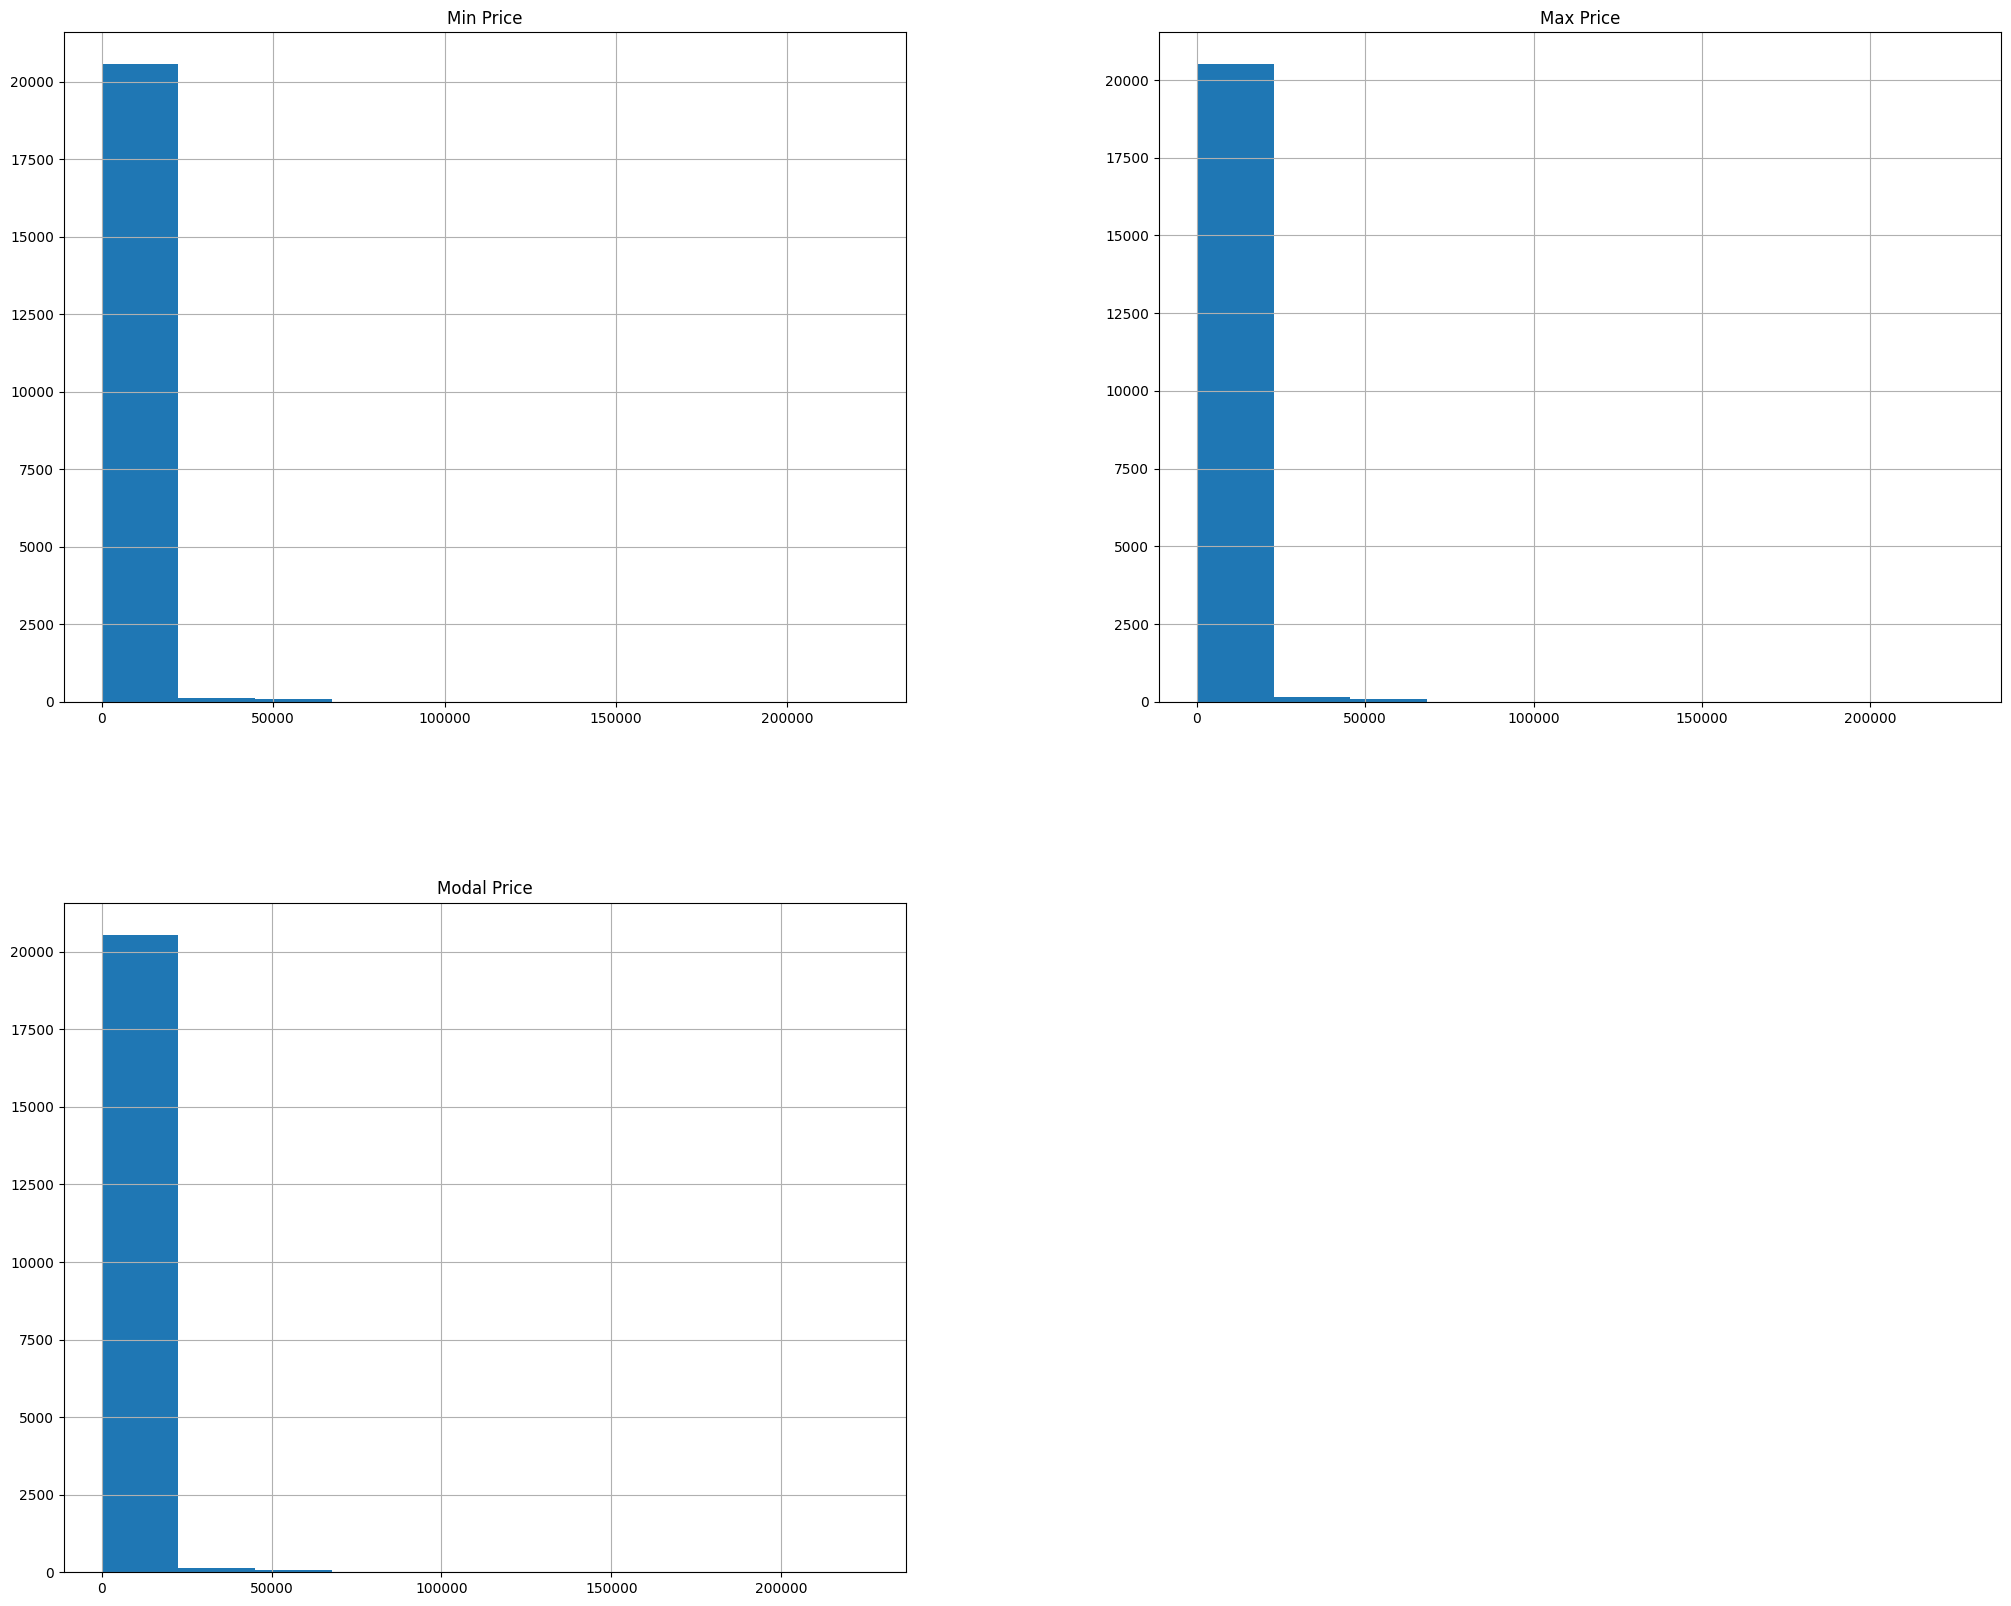

In [7]:
import matplotlib.pylab as plt
data.hist(figsize=(25, 20))
plt.show

### *Checking For Null Values*

In [8]:
data.isnull().sum()

State              0
District           0
Market             0
Commodity          0
Variety            0
Grade              0
Arrival_Date       0
Min Price       2309
Max Price       2309
Modal Price     2309
dtype: int64

In [9]:
#Shape Of dataset
data.shape

(23093, 10)

### *Dropping The Duplicates*

In [10]:
data.drop_duplicates()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Mehsana,Kadi,Castor Seed,Caster,FAQ,01-08-2023,NaN,NaN,NaN
1,Uttar Pradesh,Banda,Baberu,Garlic,Garlic,FAQ,28-07-2023,NaN,NaN,NaN
2,Maharashtra,Pune,Pune(Moshi),Pomegranate,Other,FAQ,30-07-2023,NaN,NaN,NaN
3,Punjab,Hoshiarpur,Dasuya,Papaya,Other,Medium,01-08-2023,NaN,NaN,NaN
4,Uttar Pradesh,Aligarh,Charra,Pumpkin,Pumpkin,FAQ,28-07-2023,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23088,Odisha,Boudh,Boudh,Cabbage,Other,FAQ,31-07-2023,3500.0,4000.0,4000.0
23089,Uttar Pradesh,Lucknow,Lucknow,Gur(Jaggery),Yellow,FAQ,01-08-2023,3720.0,3820.0,3770.0
23090,Uttrakhand,UdhamSinghNagar,Khateema,Mango,Other,Medium,28-07-2023,2000.0,2500.0,2200.0
23091,Haryana,Hissar,Barwala(Hisar),Cauliflower,Other,FAQ,28-07-2023,3000.0,4000.0,3500.0


In [11]:
data.shape

(23093, 10)

#### ***No Duplicates Found***, *Because Shape Of Dataset before and After Dropping Duplicates remains Same*

### *Understanding The Data*

In [12]:
data.describe()

,Min Price,Max Price,Modal Price
count,20784.000000,20784.000000,20784.000000
mean,4182.935007,4978.415844,4601.231135
std,5496.295044,6314.014737,5868.199268
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1961.500000
50%,2720.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


### *Datatypes Of All Our Features*

In [13]:
data.dtypes

State            object
District         object
Market           object
Commodity        object
Variety          object
Grade            object
Arrival_Date     object
Min Price       float64
Max Price       float64
Modal Price     float64
dtype: object

## **4. Modelling Before Pre-processing**

***Just doing basic pre-processing to avoid errors***

### *Dropping Null Values*

In [14]:
df = data.dropna()

### *Encoding The Features*

In [15]:
categorical_columns = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"{column} has {unique_values} unique values")

State has 27 unique values
District has 401 unique values
Market has 1276 unique values
Commodity has 232 unique values
Variety has 444 unique values
Grade has 4 unique values


In [16]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month

df = df.drop(columns=['Arrival_Date'])

In [17]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price,Year,Month
2309,24,132,857,28,356,0,2650.0,2750.0,2700.0,2023,7
2310,10,91,313,14,145,0,4500.0,5000.0,4700.0,2023,8
2311,12,98,335,159,306,2,2000.0,4000.0,3000.0,2023,7
2312,24,130,409,103,437,0,4490.0,4550.0,4520.0,2023,8
2313,20,162,493,59,306,0,3000.0,3500.0,3200.0,2023,7


<Axes: >

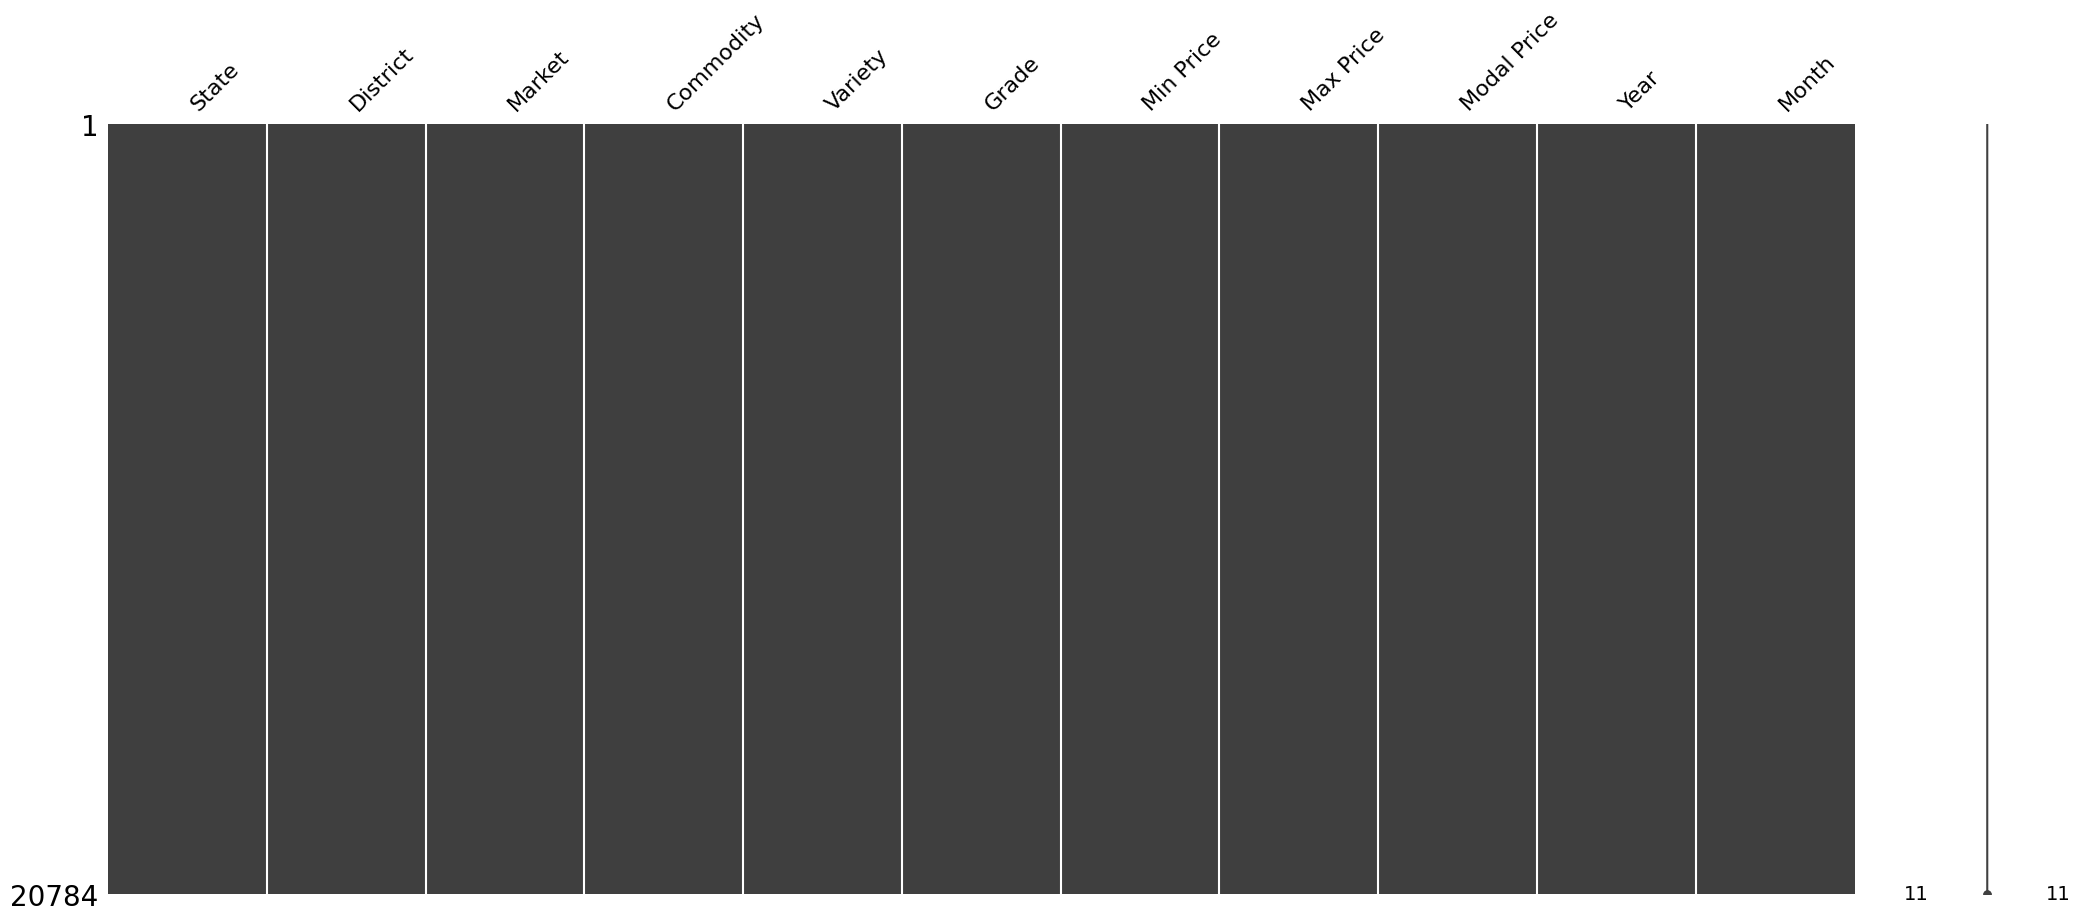

In [18]:
msno.matrix(df)

In [19]:
dset = df.copy()

## **5. Modelling**

In [20]:
X = df.drop(columns=['Modal Price'])
y = df['Modal Price']

### *PCA*

In [21]:
pca = PCA(n_components=5)
X = pca.fit_transform(X) # storing in different Dataset variable

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [9.74939743e-01 2.28416318e-02 1.81906850e-03 1.89041571e-04
 1.55550323e-04]


### *Train/Test Split*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("Shape of X Train:",X_train.shape)
print("Shape of y Train:",y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (16627, 5)
Shape of y Train: (16627,)
Shape of X Test: (4157, 5)
Shape of y Test: (4157,)


### ***Models Implementation***

In [24]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
xgb_model = xgb.XGBRegressor()

In [25]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
ridge_model.fit(X_train, y_train)

Ridge()

In [27]:
lasso_model.fit(X_train, y_train)

Lasso()

In [28]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [30]:
y_train_pred_linear = linear_model.predict(X_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_train_pred_lasso = lasso_model.predict(X_train)
y_train_pred_xgb = xgb_model.predict(X_train)

## **6. Evaluation Metrics**

### *MSE*

In [31]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [32]:
mse_results = {
    "Linear Regression": mse_linear,
    "Ridge Regression": mse_ridge,
    "Lasso Regression": mse_lasso,
    "XGBoost": mse_xgb
}

mse_results

{'Linear Regression': np.float64(933445.0018293654),
 'Ridge Regression': np.float64(933445.0018300522),
 'Lasso Regression': np.float64(933446.1851574209),
 'XGBoost': np.float64(8923754.756028371)}

In [33]:
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [34]:
# Display R-squared results (higher R-squared means better model performance)
r2_results = {
    "Linear Regression": r2_linear,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso,
    "XGBoost": r2_xgb
}

In [35]:
print("R-squared results (Accuracy):")
r2_results

R-squared results (Accuracy):


{'Linear Regression': 0.9668330489705509,
 'Ridge Regression': 0.9668330489705265,
 'Lasso Regression': 0.9668330069248132,
 'XGBoost': 0.6829232183878455}

In [36]:
r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

In [37]:
# Display R-squared results (higher R-squared means better model performance)
r23_results = {
    "Linear Regression": r2_train_linear,
    "Ridge Regression": r2_train_ridge,
    "Lasso Regression": r2_train_lasso,
    "XGBoost": r2_train_xgb
}

In [38]:
#converting into dataframe
r23_df = pd.DataFrame(list(r23_results.items()), columns=["Model", "R-squared"]) 

In [39]:
print("R-squared results (Accuracy):")
r23_df

R-squared results (Accuracy):


,Model,R-squared
0,Linear Regression,0.994880
1,Ridge Regression,0.994880
2,Lasso Regression,0.994880
3,XGBoost,0.999615


## **7. Pre-Processing**

***Since, Missing values and Encoding Done, Let us do some more***

### *Finding Outliers*

#### *IQR Method for Outlier Detection*

In [40]:
def detect_outliers_lof(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])    
    # Fit the LOF model
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    outliers = model.fit_predict(df_numeric)    
    # -1 indicates an outlier, 1 indicates a normal point
    outlier_indices = df_numeric.index[outliers == -1].tolist()    
    return outlier_indices

outliers_lof = detect_outliers_lof(dset)
print("Outlier indices:", outliers_lof)

Outlier indices: [2320, 2350, 2370, 2389, 2402, 2432, 2433, 2441, 2458, 2461, 2478, 2503, 2505, 2514, 2524, 2615, 2616, 2625, 2629, 2658, 2694, 2697, 2723, 2789, 2827, 2845, 2856, 2860, 2864, 2888, 2912, 2932, 2964, 2971, 2989, 3007, 3023, 3035, 3051, 3074, 3106, 3124, 3168, 3223, 3296, 3339, 3343, 3353, 3357, 3392, 3422, 3458, 3461, 3463, 3504, 3564, 3571, 3577, 3605, 3610, 3639, 3688, 3690, 3727, 3820, 3825, 3830, 3839, 3847, 3858, 3882, 3890, 3919, 3922, 3929, 3940, 3945, 4016, 4036, 4105, 4129, 4132, 4140, 4160, 4236, 4238, 4250, 4251, 4279, 4295, 4307, 4313, 4335, 4346, 4351, 4372, 4373, 4415, 4425, 4443, 4451, 4458, 4462, 4508, 4586, 4647, 4652, 4695, 4702, 4708, 4760, 4762, 4780, 4790, 4815, 4820, 4829, 4832, 4842, 4878, 4891, 4948, 4971, 4988, 4991, 4996, 5006, 5025, 5028, 5030, 5037, 5049, 5080, 5085, 5108, 5124, 5126, 5164, 5179, 5203, 5232, 5236, 5240, 5251, 5260, 5305, 5321, 5333, 5343, 5384, 5386, 5406, 5415, 5471, 5494, 5540, 5541, 5570, 5574, 5597, 5610, 5617, 5636, 5645

In [41]:
# Remove outliers
print("Shape of original data:", dset.shape)
dset = dset.drop(index=outliers_lof)
print("Shape of cleaned data:", dset.shape)

Shape of original data: (20784, 11)
Shape of cleaned data: (19744, 11)


### *Standardize Data Types*

To ensure data consistency, we will standardize the data types across all columns. For columns with **categorical data** (dtype 'object'), we will convert them to **strings**. For **numerical columns**, we will ensure they are of type **float**. This step helps maintain uniformity and prevents issues during model training.

In [42]:
# Ensure consistent data types
for col in dset.columns:
    if dset[col].dtype == 'object':
        dset[col] = dset[col].astype(str)
    else:
        dset[col] = dset[col].astype(float)

### *Heatmap (Co-relation Matrix)*

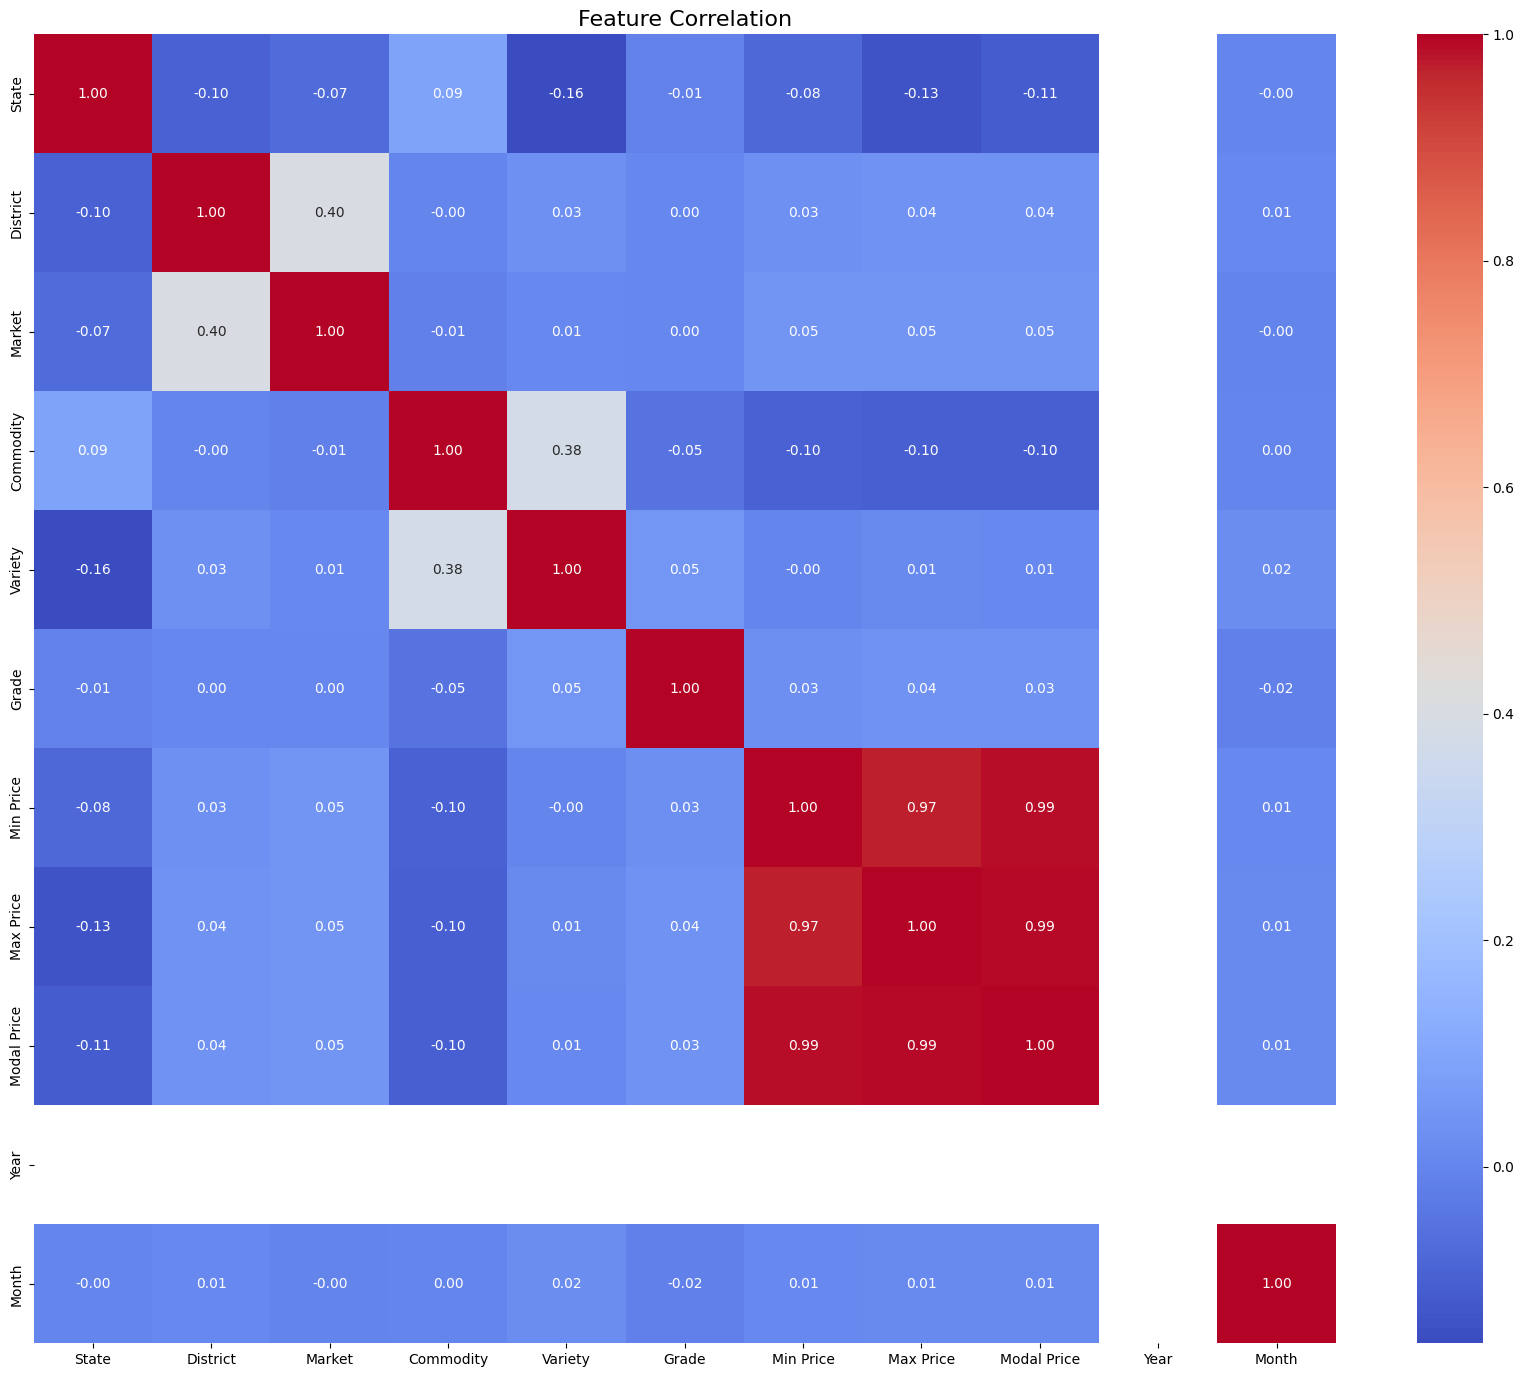

In [43]:
# Adjusting the figure size and font size for better readability
plt.figure(figsize=(21, 17))  # Increase figure size
sns.heatmap(dset.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Adjust font size
plt.title("Feature Correlation", fontsize=16)  # Increase title font size
plt.xticks(fontsize=10)  # Adjust x-axis font size
plt.yticks(fontsize=10)  # Adjust y-axis font size
plt.show()

In [44]:
X = dset.drop(columns=['Modal Price'])
y = dset['Modal Price']

### *Data Transformation*

In [45]:
dset.dtypes

State          float64
District       float64
Market         float64
Commodity      float64
Variety        float64
Grade          float64
Min Price      float64
Max Price      float64
Modal Price    float64
Year           float64
Month          float64
dtype: object

In [46]:
dset.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price,Year,Month
2309,24.0,132.0,857.0,28.0,356.0,0.0,2650.0,2750.0,2700.0,2023.0,7.0
2310,10.0,91.0,313.0,14.0,145.0,0.0,4500.0,5000.0,4700.0,2023.0,8.0
2311,12.0,98.0,335.0,159.0,306.0,2.0,2000.0,4000.0,3000.0,2023.0,7.0
2312,24.0,130.0,409.0,103.0,437.0,0.0,4490.0,4550.0,4520.0,2023.0,8.0
2313,20.0,162.0,493.0,59.0,306.0,0.0,3000.0,3500.0,3200.0,2023.0,7.0


In [47]:
# Initialize the scaler
scaler = MinMaxScaler()

In [48]:
# Separate features and target
A = dset.drop(columns=['Modal Price'])  # Drop the target column
b = dset['Modal Price']  # Target column

In [49]:
# Scale the features
scaled_features = scaler.fit_transform(A)

In [50]:
# Create a new DataFrame with scaled features
df2 = pd.DataFrame(scaled_features, columns=A.columns)

In [51]:
# Add the target column back to the DataFrame
df2['label'] = b.values

In [52]:
# Check the first few rows of the scaled data
df2.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Year,Month,label
0,0.923077,0.3300,0.672157,0.121212,0.803612,0.000000,0.045683,0.044937,0.0,0.0,2700.0
1,0.384615,0.2275,0.245490,0.060606,0.327314,0.000000,0.077580,0.081716,0.0,1.0,4700.0
2,0.461538,0.2450,0.262745,0.688312,0.690745,0.666667,0.034476,0.065370,0.0,0.0,3000.0
3,0.923077,0.3250,0.320784,0.445887,0.986456,0.000000,0.077407,0.074360,0.0,1.0,4520.0
4,0.769231,0.4050,0.386667,0.255411,0.690745,0.000000,0.051717,0.057197,0.0,0.0,3200.0


## **8. Modeling After Pre-processing**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [54]:
print("Shape of X Train:",X_train.shape)
print("Shape of y Train:",y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (15795, 10)
Shape of y Train: (15795,)
Shape of X Test: (3949, 10)
Shape of y Test: (3949,)


### ***Models Implementation***

In [55]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
xgb_model = xgb.XGBRegressor()

In [56]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [57]:
ridge_model.fit(X_train, y_train)

Ridge()

In [58]:
lasso_model.fit(X_train, y_train)

Lasso()

In [59]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

## **9. Evaluation Metrics**

### *MSE*

In [61]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

In [62]:
mse_results = {
    "Linear Regression": mse_linear,
    "Ridge Regression": mse_ridge,
    "Lasso Regression": mse_lasso,
    "XGBoost": mse_xgb
}

mse_results

{'Linear Regression': np.float64(45280.2114987468),
 'Ridge Regression': np.float64(45280.212424057834),
 'Lasso Regression': np.float64(45294.68685798875),
 'XGBoost': np.float64(113117.33458717786)}

In [63]:
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [64]:
# Display R-squared results (higher R-squared means better model performance)
r2_res_af = {
    "Linear Regression": r2_linear,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso,
    "XGBoost": r2_xgb
}

In [65]:
#converting into dataframe
r2_met = pd.DataFrame(list(r2_res_af.items()), columns=["Model", "R-squared"]) 

In [66]:
r2_met

,Model,R-squared
0,Linear Regression,0.998205
1,Ridge Regression,0.998205
2,Lasso Regression,0.998204
3,XGBoost,0.995515


## **10. Conclusion**

#### **Best Model**

The **Linear Regression** and **Ridge Regression** models have the highest **R-squared** values of **0.998205**, indicating they perform slightly better than Lasso Regression and significantly better than XGBoost in terms of explaining the variance in the data.

## **11. Giving Input For Verification**

In [67]:
# Provided input data
input_data = {
    'State': 'Meghalaya',
    'District': 'East Khasi Hills',
    'Market': 'Sohra',
    'Commodity': 'Arecanut(Betelnut/Supari)',
    'Variety': 'Other',
    'Grade': 'FAQ',
    'Min Price': 229500,
    'Max Price': 328500,
    'Year': 2028,  
    'Month': 8     
}

In [68]:
# Encode categorical variables
encoded_input = {}
for column in label_encoders.keys():
    encoded_input[column] = label_encoders[column].transform([input_data[column]])[0]

In [69]:
# Add numerical features
encoded_input['Min Price'] = input_data['Min Price']
encoded_input['Max Price'] = input_data['Max Price']
encoded_input['Year'] = input_data['Year']
encoded_input['Month'] = input_data['Month']

In [70]:
input_df = pd.DataFrame([encoded_input])

In [71]:
# Predict using the trained XGBoost model
predicted_price = linear_model.predict(input_df)

In [72]:
# Output the predicted modal price
print(f"Predicted Modal Price: {predicted_price[0]:.2f}")

Predicted Modal Price: 282790.41
